# TensorFlow Core Learning Algorithms

4 fundamental machine learning algorithms
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

Tensor flow has plenty of pre built tools to easily implement these algortihms

## Linear Regression
sources: https://www.tensorflow.org/tutorials/estimator/linear

If data points are related linearly then we can us linear regression teqnique to find line equation that best represents(meaning least error) our data. 

Purpose of generating line equation is to be able to predict outcomes at values not included in original dataset.

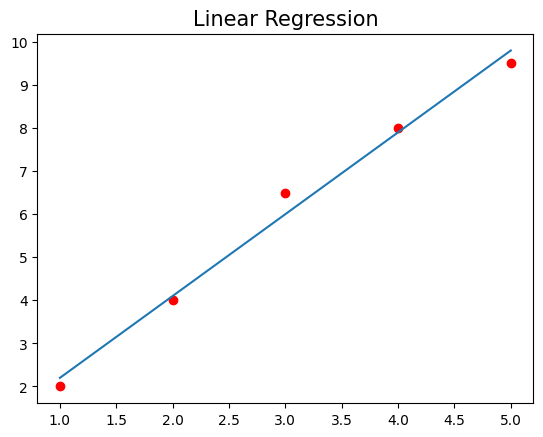

In [22]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6.5, 8, 9.5])

plt.title('Linear Regression', fontsize = 15)
plt.plot(x, y, 'ro')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x))) #using numpy polyfit for visualizing
plt.show()

Linear Regression basically is a method used to compute coefficient values of the line equation that best represents (minimizes error) our data
$$y = mx + c$$

### Working with Data

In [23]:
!pip install -q sklearn

You should consider upgrading via the 'c:\users\joelb\documents\study\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [24]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [26]:
#Load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') #testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

###Use method .head()
# print(dftrain.head())
# print(dftrain.loc[0])
print(y_train.loc[0])

0


In [27]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [28]:
!pip install --upgrade numpy
!pip install --upgrade pandas

You should consider upgrading via the 'c:\users\joelb\documents\study\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\joelb\documents\study\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [29]:
#Faced
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [31]:
dftrain.shape

(627, 9)

In [32]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<AxesSubplot: >

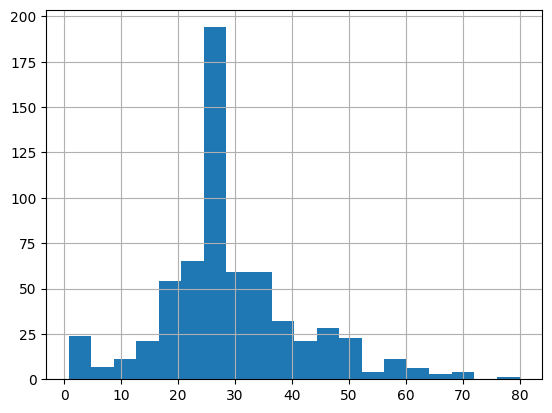

In [33]:
dftrain['age'].hist(bins = 20)

<AxesSubplot: >

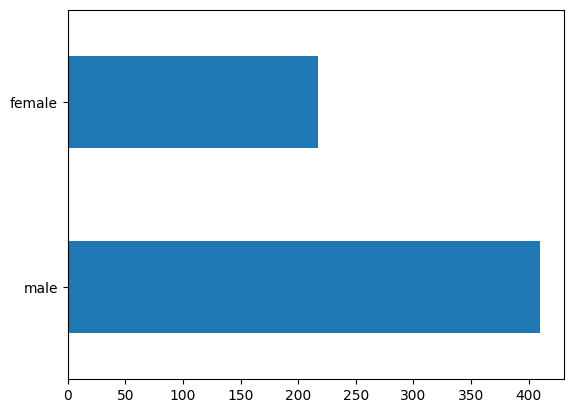

In [34]:
dftrain.sex.value_counts().plot(kind = 'barh')

<AxesSubplot: >

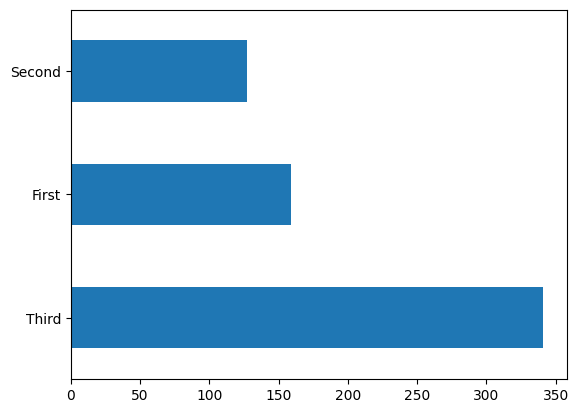

In [35]:
dftrain['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, '% survive')

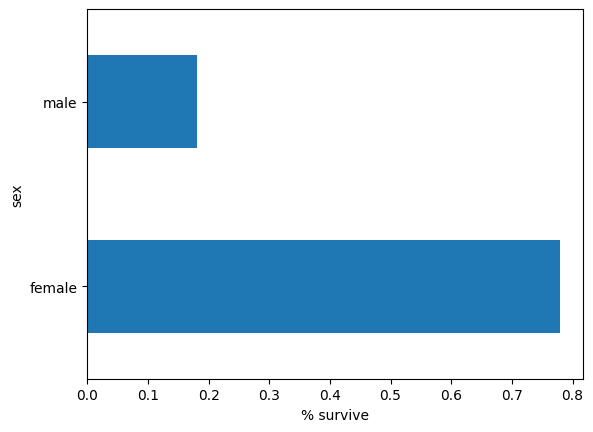

In [36]:
pd.concat([dftrain, y_train], axis = 1).groupby('sex')['survived'].mean().plot(kind = 'barh').set_xlabel('% survive')
# pd.concat([dftrain, y_train], axis = 1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('% survive')

### Training vs Testing Data
- Training data as name suggest is the subset of available dataset to develop prediction model
- Testing data is the subset of data set that is used to test accuracy of prediction model

#### Categorical Data
- 
- Must be encoded into numerical value to be able to do operations on 

In [37]:
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [41]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

### Training Process

Model is going to be trained by streaming data into model in batches. In this case it would be small batches of 32(total ~600). Each small batch will be fed multiple times(equal to $\textbf{epochs}$ ), this way the model better determines how to estimate it.

An $\textbf{epoch}$ is ine stream of the entire dataset. Number of epochs is the number of times model will see the entire dataset. 


### Input Function

The tensor flow model we are going to use requires that the data we send the model be of tf.data.Dataset object. We must create an input function that converts the pandas dataframe in to this object type


In [44]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


### Training

Create Estimator

In [45]:
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns) #Create Estimator
linear_est.train(train_input_fn) #train
result = linear_est.evaluate(eval_input_fn) #get model metrics/stats by testing on testing data
clear_output()
print(result['accuracy'])

0.75


### Predict

In [46]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(y_eval.loc[4])
print(result[4]['probabilities'][1])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\joelb\AppData\Local\Temp\tmp7102zbrs\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.26998314


## Classification

Classification is used to seperate data points into classes of different labels. 

Source: https://www.tensorflow.org/tutorials/estimator/premade

### Dataset

The dataset seperates flowers into 3 different species
- Setosa
- VersiColor
- Virginica

Given parameters
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width
- Species

In [47]:
CSV_COLUMN_NAMES = ['SepalLength', "SepalWidth", 'PetalLength', 'PetalWidth','Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']


In [48]:
train_path = tf.keras.utils.get_file( "iris_training.csv", 
                                        "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", 
                                        "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")
train = pd.read_csv(train_path, names = CSV_COLUMN_NAMES, header = 0)
test = pd.read_csv(test_path, names = CSV_COLUMN_NAMES, header = 0)

In [49]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Pop species of the dataset to use as the label

In [50]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train_y.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

In [51]:
train.shape

(120, 4)

### Input Function

In [52]:
def input_fn(features, labels, training = True, batch_size = 256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    
    if training:
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)

### Feature Columns


In [53]:
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key = key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


### Building the Model
eg Models:
- DNNClassifier (Deep Neural Network)
- LinearClassifier

Either works but DNN seems best because there may not be linear correspondence in our data.

In [54]:
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,

    hidden_units = [30, 10],

    n_classes = 3)

classifier.train(
    input_fn = lambda: input_fn(train, train_y, training = True), ## notice that embedding input function in function not required when calling lambda
    steps = 5000)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\joelb\\AppData\\Local\\Temp\\tmpsv3aiwpj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorf

In [55]:
eval_result = classifier.evaluate(input_fn = lambda: input_fn(test, test_y, training = False))
print('\n Test Accuracy : {accuracy: 0.3f}\n'.format(**eval_result))
# clear_output()

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-12-03T14:32:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\joelb\AppData\Local\Temp\tmpsv3aiwpj\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.26273s
INFO:tensorflow:Finished evaluation at 2022-12-03-14:32:35
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.93333334, average_loss = 0.36043116, global_step = 5000, loss = 0.36043116
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\joelb\AppData\Local\Temp\tmpsv3aiwpj\model.ckpt-5000

 Test Accuracy :  0.933



### Predictions

In [57]:
def input_fn(features, batch_size = 256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', "SepalWidth", 'PetalLength', 'PetalWidth']
predict = {}

for feature in features:
    valid = True
    while valid:
        val = input(feature + ": ")
        if not val.isdigit(): valid = False
    
    predict[feature] = [float(val)]
    
predictions = classifier.predict(input_fn = lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    
    print('Prediction is "{}" ({:.1f}%)'.format(
    SPECIES[class_id], 100*probability))

SepalLength: 0.4
SepalWidth: 0.4
PetalLength: 0.2
PetalWidth: 0.3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\joelb\AppData\Local\Temp\tmpsv3aiwpj\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (47.1%)


In [58]:

# Here is some example input and expected classes you can try above
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

## Clustering

To find clusters of like datapoints
- clustering digits (0-9)

Basic Algorithm for K-Means 
- Randomly pick K points to place K centroids
- Assign all of the data points to the K centroids based on least distance
- Average points belonging to each centroid to find new K centroids
- Repeat process of reassigning data points to new K centroids based on least distance
- Repeat process until set of points belonging to each cluster do not change


## Hidden Markov Models

The Hidden Markov Model is a finite set of states, each of which is associated with a (generally multidimensional) probability distribution. Transitions among the states are governed by a set of probabilities called transition probabilites.

A hidden markov model works with probabilites to predict future events or states.

Practice: Create Model that can predict the weather

Components in hidden markov models

$\textbf{STATES}$ : Each markov models have a finite set of states. These states could be something like "warm" and "cold" or "red", "blue" and "green"

$\textbf{OBSERVATIONS}$ : Each state has a particular outcome or observation associated with it based on a probability distribution. eg. On a "hot"(state) day Joel has a 80% chance of being happy and 20% chance of being sad

$\textbf{TRANSITIONS}$ : Each state will probability defining the likelihood of transitioning to another state. eg. On a "hot"(state) day the following day has a 80% chance of staying "hot" and 20% chance of transitioning to "cold" day

To create hidden markov model we need
- States
- Observation probibility distributions
- Transitioning probability




In [74]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

UsageError: Line magic function `%tensorflow_version` not found.


In [76]:
!pip install tensorflow_probability==0.8.0rc0 --upgrade

  Using cached tensorflow_probability-0.8.0rc0-py2.py3-none-any.whl (2.5 MB)
  Using cached cloudpickle-1.1.1-py2.py3-none-any.whl (17 kB)
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.0
    Uninstalling cloudpickle-2.2.0:
      Successfully uninstalled cloudpickle-2.2.0
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.18.0
    Uninstalling tensorflow-probability-0.18.0:
      Successfully uninstalled tensorflow-probability-0.18.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-agents 0.14.0 requires cloudpickle>=1.3, but you have cloudpickle 1.1.1 which is incompatible.
tf-agents 0.14.0 requires tensorflow-probability==0.17.0, but you have tensorflow-probability 0.8.0rc0 which is incompatible.
gym 0.23.0 requires cloudpickle>=1.2.0, but you have cloudpickle 1.1.1 which is incompatible.
You should consider upgrading via the 'c:\users\joelb\documents\study\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [70]:
!pip install tensorflow_probability==0.8.0rc0 --user --upgrade

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the 'c:\users\joelb\documents\study\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [79]:
import tensorflow_probability as tfp  # We are using a different module from tensorflow this time
import tensorflow as tf


### Weather Model
Taken direclty from the TensorFlow documentation (https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/HiddenMarkovModel).

We will model a simple weather system and try to predict the temperature on each day given the following information.

1. Cold days are encoded by a 0 and hot days are encoded by a 1.
2. The first day in our sequence has an 80% chance of being cold.
3. A cold day has a 30% chance of being followed by a hot day.
4. A hot day has a 20% chance of being followed by a cold day.
On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.
If you're unfamiliar with standard deviation it can be put simply as the range of expected values.

In this example, on a hot day the average temperature is 15 and ranges from 5 to 25.

To model this in TensorFlow we will do the following.

In [89]:
tfd = tfp.distributions
initial_distribution = tfd.Categorical(probs = [0.8, 0.2])
transition_distribution = tfd.Categorical(probs = [[0.7, 0.3],
                                                  [0.2, 0.8]])
observation_distribution = tfd.Normal(loc = [0.,15.], scale = [5., 10.])

Create Hidden Markov Model

In [90]:
model = tfd.HiddenMarkovModel(
    initial_distribution = initial_distribution,
    transition_distribution= transition_distribution,
    observation_distribution = observation_distribution,
    num_steps = 7
)

The number of steps represents the number of days upto which temperature should be computed

In [91]:
mean = model.mean()
with tf.compat.v1.Session() as sess:
    print(mean.numpy())

[3.        5.9999995 7.4999995 8.25      8.625     8.812501  8.90625  ]


In [92]:
mean

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([3.       , 5.9999995, 7.4999995, 8.25     , 8.625    , 8.812501 ,
       8.90625  ], dtype=float32)>